In [2]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e6a9c8be61496bed2eb2d662ef9044e9ddd3a4e8c158439a32acc8446839c35a
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.8 MB/s eta 0:00:00


In [3]:
from typing import List, Optional
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')

#El algoritmo de Grover

## 1. Introducción

El algoritmo de Grover puede acelerar un problema de búsqueda no estructurada con una ventaja cyadrática, através de la amplificación de amplitud.

Suponga que tiene una lista grande de $N$ elementos. Entre estos elementos hay un elemento con una propiedad única que deseamos localizar; lo llamaremos el *bueno* $w$. Para encontrar a $w$ mediante el cómputo clásico, habría que comprobar en promedio $N/2$ de estas cajas y, en el peor de los casos, las $N$ de ellas. Sin embargo, en una computadora cuántica, podemos encontrar el elemento marcado en aproximadamente $\sqrt{N}$ pasos con el truco de amplificación de amplitud de Grover.

### 1.1 Descripción general del algoritmo

El algoritmo de Grover consta de tres pasos principales: preparación del estado, el oráculo y el operador de Grover. La preparación del estado es donde creamos el espacio de búsqueda, que son todos los casos posibles que podría tomar la respuesta. El oráculo marca la respuesta que estamos buscando, y el operador de Grover magnifica la respuesta, para que pueda destacarse y medirse al final del algoritmo.

Antes de mirar la lista de elementos, no tenemos idea de dónde está el elemento marcado. Por lo tanto, cualquier suposición de su ubicación es tan buena como cualquier otra: $$|s \rangle = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N -1} | x\rangle.$$

Si en este punto tuviéramos que medir en la base computacional, nuestras posibilidades de adivinar el valor correcto $w$ son, por lo tanto, $1$ en $2^n$, como era de esperar. Por lo tanto, en promedio, necesitaríamos intentar aproximadamente $N/2 = 2^{n-1}$ veces para adivinar el elemento correcto.

Usamos entonces la amplificación de amplitud. Este procedimiento extiende (amplifica) la amplitud del elemento marcado, lo que reduce la amplitud de los otros elementos, de modo que la medición del estado final devolverá el elemento correcto con casi certeza.

Este algoritmo tiene una buena interpretación geométrica en términos de dos reflexiones, que generan una rotación en un plano bidimensional. Los únicos dos estados especiales que debemos considerar son el bueno $| w \rangle$ y la superposición uniforme $| s \rangle$. Estos dos vectores abarcan un plano bidimensional en el espacio vectorial ${\mathbb{C}^N}$. Introducimos un estado adicional $|s'\rangle$ que se encuentra en el espacio de estos dos vectores, que es perpendicular a $| w \rangle$ y se obtiene a partir de $|s \rangle$ eliminando $| w \rangle$ y reescalando.

**Paso 1**: El procedimiento de amplificación de amplitud comienza con la superposición uniforme $| s \rangle$, que se construye a partir de $| s \rangle = H^{\otimes n} | 0 \rangle^n$.

**Paso 2**: Aplicamos la reflexión del oráculo $U_f$ al estado $|s\rangle$.

Esto corresponde a una reflexión del estado $|s\rangle$ sobre $|s'\rangle$. Esta transformación significa que la amplitud frente al estado $|w\rangle$ se vuelve negativa, lo que a su vez significa que la amplitud promedio se ha reducido.

**Paso 3**: Ahora aplicamos una reflexión adicional ($U_s$) sobre el estado $|s\rangle$: $U_s = 2|s\rangle\langle s| - \mathbb{1}$. Esta transformación asigna el estado a $U_s U_f| s \rangle$ y completa la transformación.


Dos reflexiones siempre corresponden a una rotación. La transformación $U_s U_f$ hace rotar el estado inicial $|s\rangle$ para acercarlo al bueno $|w\rangle$. La acción de la reflexión $U_s$ en el diagrama de barras de amplitud se puede entender como una reflexión sobre la amplitud media. Dado que la amplitud media se ha reducido por la primera reflexión, esta transformación aumenta la amplitud negativa de $|w\rangle$ a aproximadamente tres veces su valor original, mientras que disminuye las otras amplitudes. Luego pasamos al **paso 2** para repetir la aplicación. Este procedimiento se repetirá varias veces para dar con el ganador.

Después de $t$ pasos estaremos en el estado $|\psi_t\rangle$ donde: $| \psi_t \rangle = (U_s U_f)^t | s \rangle$.

¿Cuántas veces necesitamos aplicar la rotación? Resulta que aproximadamente $\sqrt{N}$ rotaciones son suficientes. Esto se vuelve claro cuando observamos las amplitudes del estado $| \psi \rangle$. Podemos ver que la amplitud de $| w \rangle$ crece linealmente con el número de aplicaciones $\sim t N^{-1/2}$. Sin embargo, dado que estamos tratando con amplitudes y no con probabilidades, la dimensión del espacio vectorial entra como una raíz cuadrada. Por lo tanto, es la amplitud, y no solo la probabilidad, lo que se está amplificando en este procedimiento.

Para calcular el número de rotaciones necesitamos saber el tamaño del espacio de búsqueda y el número de respuestas que buscamos. Para obtener el número óptimo de iteraciones $t$, podemos seguir la ecuación:

$$
t = \lfloor\frac{\pi}{4}\sqrt{N}\rfloor
$$

Donde N es el tamaño del espacio de búsqueda.

## 1.2 Grover paso a paso

## 1.2.1 Preparación del espacio de búsqueda

El primer paso del algoritmo de Grover es la preparación del estado inicial. El espacio de búsqueda son todos los valores posibles que necesitamos buscar para encontrar la respuesta que queremos. Por ejemplo, si tenemos 3 qubits, nuestra lista son los estados $|000\rangle, |001\rangle, \dots |111\rangle$ (es decir, los estados $|0\rangle \rightarrow |7\rangle$). Por lo tanto, en este caso, el tamaño de nuestro espacio de búsqueda será $N = 2^{3} = 8$.


## 1.2.2 Creación del Oráculo

El segundo paso del algoritmo de Grover es el oráculo. Los oráculos añaden una fase negativa a los estados de la solución para que puedan destacarse del resto y ser medidos. Es decir, para cualquier estado $|x\rangle$ en la base computacional:

$$
U_\omega|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle \quad \text{si} \; x \neq \omega \\
-|x\rangle \quad \text{si} \; x = \omega \\
\end{aligned}
$$

Este oráculo será una matriz diagonal, donde la entrada que corresponda al elemento marcado tendrá una fase negativa. Por ejemplo, si tenemos tres qubits y $\omega = \text{101}$, nuestro oráculo tendrá la matriz:

$$
U_\omega =
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
$$

Podemos crear una función $f$ que tome una solución propuesta $x$ y devuelva $f(x) = 0$ si $x$ no es una solución ($x \neq \omega$) y $f(x) = 1$ para una solución válida ($x = \omega$). Nuestro oráculo puede describirse entonces como:

$$
U_\omega|x\rangle = (-1)^{f(x)}|x\rangle
$$

y la matriz del oráculo será una matriz diagonal de la forma:

$$
U_\omega =
\begin{bmatrix}
(-1)^{f(0)} & 0 & \cdots & 0 \\
0 & (-1)^{f(1)} & \cdots & 0 \\
\vdots & 0 & \ddots & \vdots \\
0 & 0 & \cdots & (-1)^{f(2^n-1)} \\
\end{bmatrix}
$$

Crearemos ejemplos de oráculos en los que conocemos de antemano el valor de $\omega$ y no nos preocuparemos de si estos oráculos son útiles o no.

## 2. Ejemplo: 2 qubits

En este caso, $N=4$, por lo que sólo se requiere una rotación para llevar el estado inicial $|s\rangle$ al ganador $|w\rangle$:

1. En el caso $N=4$ tenemos

$$\theta = \arcsin \frac{1}{2} = \frac{\pi}{6}.$$

2. Después de $t$ pasos, tenemos

$$(U_s U_\omega)^t | s \rangle = \sin \theta_t | \omega \rangle + \cos \theta_t | s' \rangle ,$$

donde

$$\theta_t = (2t+1)\theta.$$

3. Para obtener $| \omega \rangle$ necesitamos $\theta_t = \frac{\pi}{2}$, que con $\theta=\frac{\pi}{6}$ insertado arriba da como resultado $t=1$. Esto implica que después de una rotación de $t=1$ se encuentra el elemento buscado.

Veamos un ejemplo usando un oráculo específico.

#### Oráculo para $| \omega \rangle = | 11 \rangle$
Veamos el caso $| w \rangle = | 11 \rangle$. El oráculo $U_\omega$ en este caso actúa de la siguiente manera:

$$U_\omega | s \rangle = U_\omega \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle + |11\rangle \right) = \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle - |11\rangle \right).$$

o:

$$
U_\omega =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}
$$

que puede reconocer como (**Ejercicio 1**) la compuerta **¿?**

#### Reflexión $U_s$

Para completar el circuito, necesitamos implementar la reflexión adicional $U_s = 2|s\rangle\langle s| - \mathbb{1}$. Como se trata de una reflexión sobre $|s\rangle$, queremos agregar una fase negativa a cada estado ortogonal a $|s\rangle$.

Una forma de hacer esto es usar la operación que transforma el estado $|s\rangle \rightarrow |0\rangle$, que ya sabemos que es la puerta Hadamard aplicada a cada qubit:

$$H^{\otimes n}|s\rangle = |0\rangle$$

Luego aplicamos un circuito que agrega una fase negativa a los estados ortogonales a $|0\rangle$:

$$U_0 \frac{1}{2}\left( \lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle \right) = \frac{1}{2}\left( \lvert 00 \rangle - \lvert 01 \rangle - \lvert 10 \rangle - \lvert 11 \rangle \right)$$

es decir, los signos de cada estado se invierten excepto $\lvert 00 \rangle$.

**Ejercicio 2:** Encuentre el circuito que hace esa operación.

Finalmente, realizamos la operación que transforma el estado $|0\rangle \rightarrow |s\rangle$ (la compuerta H nuevamente):

$$H^{\otimes n}U_0 H^{\otimes n} = U_s$$

### 2.1 Implementación de Qiskit

Ahora implementamos el algoritmo de Grover para el caso anterior de 2 qubits para $\lvert w \rangle = |11\rangle$.

In [3]:
## Preparamos el circuito de dos qubits

n = 2
grover_circuit = QuantumCircuit(n)

In [4]:
# Creamos una función que, para n qubits, genere el estado inicial

def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
    qc.barrier()
    return qc

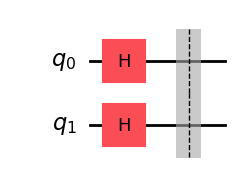

In [5]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw('mpl')

**Ejercicio 3:** aplique el oráculo tal que $|\omega\rangle=|11\rangle$

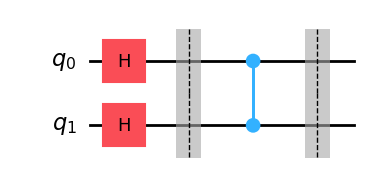

In [6]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.barrier()
grover_circuit.draw('mpl')

**Ejercicio 4:** aplique el operador de Grover, $G=HU_0HU_s$

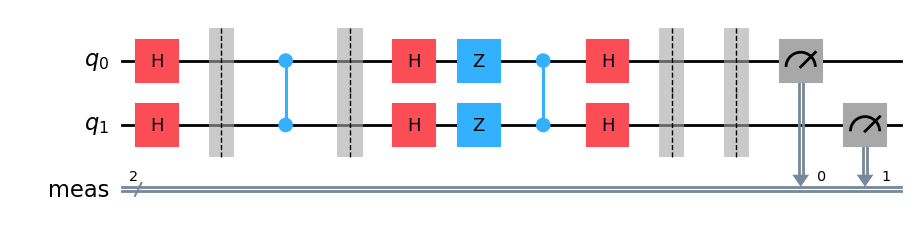

In [7]:
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.barrier()
grover_circuit.measure_all()
grover_circuit.draw('mpl')

#### Simulamos el circuito

In [1]:
shots = 1
counts = backend.run(grover_circuit, shots=shots).result().get_counts()
plot_histogram(counts)

NameError: name 'backend' is not defined

#### Ejecutamos en hardware cuántico

In [9]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 3.9 MB/s eta 0:00:00


In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService
ibm_quantum_service = QiskitRuntimeService(channel="ibm_quantum", token="49992489bd836a0f70ea23cb8fed4a468650bfd9e4e63a429314c4218b676aea3dde538fd3a706b5b98a88f39a40f54a0f256f353f8ae83e4712b7b461c92e29")
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

In [11]:
backend = ibm_quantum_service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(grover_circuit)

In [12]:
sampler = Sampler(mode=backend)
sampler.options.default_shots = 4096
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

Job ID is cwsr6ah997wg008xm9jg
Counts for the meas output register: {'10': 145, '11': 3740, '01': 195, '00': 16}


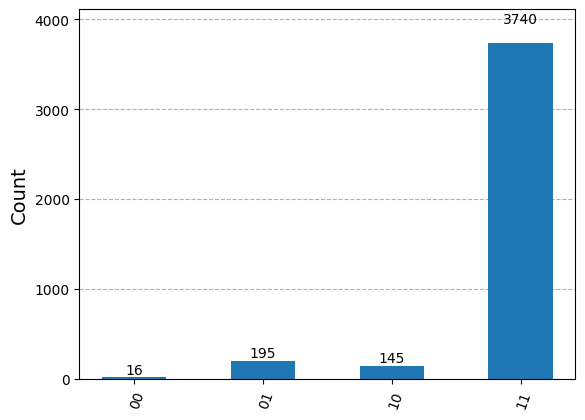

In [13]:
plot_histogram(pub_result.data.meas.get_counts())

**Ejercicio 4:** Muestre que el iterador de Grover es un operador unitario.

#### Construyamos el algoritmo para $n$ qubits

In [4]:
## Preparamos el circuito de dos qubits
n = 3
grover_circuit = QuantumCircuit(n)

In [5]:
# Creamos una función que, para n qubits, genere el estado inicial

def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
    qc.barrier()
    return qc

**Paso 1.** Creamos el estado inicial: $H|0\rangle$

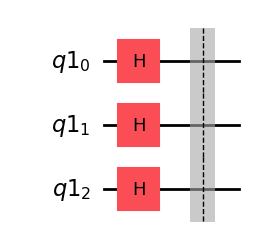

In [6]:
qr = QuantumRegister(n)
grover_circuit = QuantumCircuit(qr)
grover_circuit = initialize_s(grover_circuit, qr)
grover_circuit.draw('mpl')

**Paso 2.** Creamos el oráculo. Buscaremos el estado $|1\cdots1\rangle$

In [7]:
#Inicializamos el oráculo en forma matricial

oracle_matrix=np.identity(2**n)
oracle_matrix[2**n-1][2**n-1] = -1
oracle_matrix

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.]])


**Paso 3.** Creamos el iterador de Grover, $G=HU_0HU_f$, actuando $\frac{\pi}{4}\sqrt{2^n}$ veces.

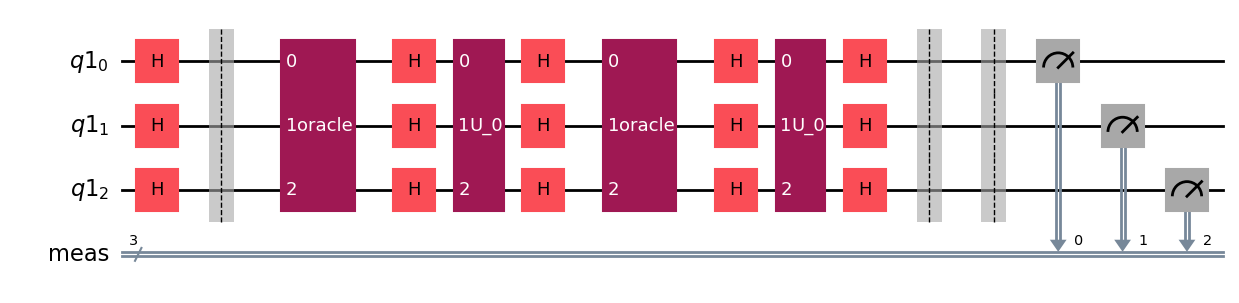

In [8]:
U0_matrix=-np.identity(2**n)
U0_matrix[0][0] = 1

for j in range(int(np.floor(np.pi*np.sqrt(2**n)/4.))):

    # LLevamos el oráculo al modelo de circuito

  grover_circuit.unitary(oracle_matrix, qubits = grover_circuit.qubits, label = "oracle")

  for i in range(n):
          grover_circuit.h(qr[i])


  grover_circuit.unitary(U0_matrix, qubits = grover_circuit.qubits, label = "U_0")

  for i in range(n):
          grover_circuit.h(qr[i])

grover_circuit.barrier()

grover_circuit.measure_all()

grover_circuit.draw('mpl')

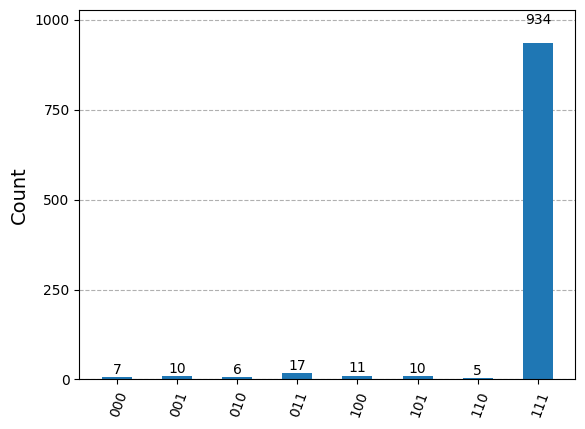

In [9]:
from qiskit import transpile

grover_circuit_transpiled = transpile(grover_circuit, backend=backend, optimization_level=3)

shots = 1000
counts = backend.run(grover_circuit_transpiled, shots=shots).result().get_counts()
plot_histogram(counts)

In [ ]:
(np.pi/4.)*np.sqrt(8)

In [50]:
U0_matrix

array([[ 1., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -1., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -1., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -1., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -1., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -1., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -1., -0.],
       [-0., -0., -0., -0., -0., -0., -0., -1.]])